In [2]:
import numpy as np
from pymatgen.core import Structure
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import json

2023-11-30 22:35:45.872144: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-30 22:35:45.875395: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-30 22:35:45.917198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 22:35:45.917235: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 22:35:45.917260: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# 数据集准备 

In [3]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgapTrain1.json", "r") as f:
    data_train = json.load(f)

In [4]:
structures = []
gaps = []

for item in data_train:
    structure = Structure.from_dict(item['structure'])
    gap = item['real_gap'] - item['bandgap']
    structures.append(structure)
    gaps.append(gap)

In [24]:
data_train

[{'structure': {'@module': 'pymatgen.core.structure',
   '@class': 'Structure',
   'charge': 0,
   'lattice': {'matrix': [[18.529572012330846,
      1.24694756e-08,
      6.2709044361e-06],
     [-4.795086209e-07, 6.521252982657631, 1.1054893964e-06],
     [3.81897325e-08, -1.02393447e-08, 6.245166844454914]],
    'pbc': [True, True, True],
    'a': 18.529572012331908,
    'b': 6.521252982657742,
    'c': 6.245166844454914,
    'alpha': 89.99999038110161,
    'beta': 89.99998025920198,
    'gamma': 90.000004174406,
    'volume': 754.6411478921391},
   'sites': [{'species': [{'element': 'H', 'occu': 1}],
     'abc': [0.234505343370995, 0.4999999999985824, 0.500000729998312],
     'xyz': [4.345283426609807, 3.26062648912405, 3.122590004494008],
     'label': 'H',
     'properties': {}},
    {'species': [{'element': 'H', 'occu': 1}],
     'abc': [0.5678386933709918, 0.4999999999985824, 0.500000729998312],
     'xyz': [10.521807739546231, 3.260626493280542, 3.1225920947955914],
     'label

In [5]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgap3Test.json", "r") as f:
    data_test = json.load(f)

In [6]:
structures_test = []
DFT_bandgaps = []

for item in data_test:
    structure = Structure.from_dict(item['structure'])
    DFT_bandgap = item['bandgap']
    structures_test.append(structure)
    DFT_bandgaps.append(DFT_bandgap)

In [7]:
DFT_bandgaps

[{'direct': True, 'energy': 1.6165000000000003, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.6435, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.9423, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.7110999999999998, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.5245000000000002, 'transition': 'Z-Z'}]

In [8]:
DFT_bandgaps_test = []
for i in DFT_bandgaps:
    DFT_bandgaps_test.append(i['energy'])

In [9]:
DFT_bandgaps_test

[1.6165000000000003, 1.6435, 1.9423, 1.7110999999999998, 1.5245000000000002]

In [10]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgap2Test.json", "r") as f:
    data_test2 = json.load(f)

In [11]:
data_test2[0]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[12.787734833883398,
     4.6395439e-09,
     0.0001114544232935],
    [-3.044480052e-07, 13.01296343422229, 3.687073349e-07],
    [2.45370005896e-05, -2.9869465e-09, 6.518215051538841]],
   'pbc': [True, True, True],
   'a': 12.7877348343691,
   'b': 13.012963434222298,
   'c': 6.518215051585025,
   'alpha': 89.99999840285068,
   'beta': 89.99928494279463,
   'gamma': 90.00000131967583,
   'volume': 1084.6722174643057},
  'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.2353852677491624, 0.2499999999996913, 0.5000228908551582],
    'xyz': [3.010056580728901, 3.253240858150094, 3.259283060192158],
    'label': 'Cs',
    'properties': {}},
   {'species': [{'element': 'H', 'occu': 1}],
    'abc': [0.3483412571701052, 0.7500000000005033, 0.499995300304],
    'xyz': [4.454507668441863, 9.759722575795951, 3.2591159928446443],
    'label': 'H',
    'propert

In [12]:
structure_test2 = Structure.from_dict(data_test2[0]['structure'])
DFT_bandgap = data_test2[0]['bandgap']['energy']


In [13]:
structure_test2.formula

'Cs1 H15 Pb4 C3 I12 N6'

In [14]:
DFT_bandgap

1.5330999999999997

In [15]:
structures_test.append(structure_test2)

In [16]:
DFT_bandgaps_test.append(DFT_bandgap)

In [17]:
print(len(structures_test))
print(len(DFT_bandgaps_test))


6
6


In [18]:
real_gaps_test = [ 1.75, 2.14, 2.28, 1.83, 1.61,1.57] 

In [19]:
for i in structures_test:
    print(i.formula)

H22 Pb4 C4 I8 Br4 N6
H22 Pb4 C4 I2 Br10 N6
H22 Pb4 C4 Br12 N6
H22 Pb4 C4 I6 Br6 N6
H22 Pb4 C4 I10 Br2 N6
Cs1 H15 Pb4 C3 I12 N6


In [20]:
DFT_bandgaps_test

[1.6165000000000003,
 1.6435,
 1.9423,
 1.7110999999999998,
 1.5245000000000002,
 1.5330999999999997]

In [21]:
# 使用列表推导式计算对应位置元素的差值  
gaps_test = [real - DFT for real, DFT in zip(real_gaps_test, DFT_bandgaps_test)]  
  
print(gaps_test)  # 输出新列表，包含对应位置元素的差值

[0.13349999999999973, 0.49650000000000016, 0.3376999999999999, 0.11890000000000023, 0.08549999999999991, 0.03690000000000038]


In [22]:
len(gaps_test)

6

In [23]:
new_gaps = gaps+gaps_test
new_structures = structures + structures_test
print(len(new_gaps))
print(len(new_structures))

108
108


# 训练集和测试集拆分

In [25]:
import random  

# 首先创建一个包含所有索引的列表  
all_indices = list(range(len(new_structures)))  
  
# 随机打乱索引列表  
random.shuffle(all_indices)  
  
# 选择前90个索引作为训练集，剩下的18个索引作为测试集  
train_indices = all_indices[:90]  
test_indices = all_indices[90:]  
  
# 根据索引创建训练集和测试集的结构和带隙列表  
train_structures = [new_structures[i] for i in train_indices]  
train_gaps = [new_gaps[i] for i in train_indices]  
  
test_structures = [new_structures[i] for i in test_indices]  
test_gaps = [new_gaps[i] for i in test_indices]  
  
# 现在你可以使用 train_structures, train_gaps, test_structures, 和 test_gaps 进行后续的操作了

In [26]:
print(all_indices)

[23, 25, 0, 104, 85, 65, 63, 73, 32, 71, 14, 10, 5, 22, 101, 17, 69, 7, 42, 70, 18, 80, 92, 106, 33, 105, 8, 34, 59, 51, 13, 45, 58, 1, 52, 66, 76, 6, 38, 40, 31, 96, 95, 47, 61, 90, 88, 36, 3, 86, 99, 49, 16, 60, 68, 50, 84, 19, 44, 4, 97, 78, 64, 82, 77, 72, 2, 30, 21, 28, 48, 87, 89, 83, 62, 11, 55, 67, 98, 9, 39, 107, 91, 54, 74, 100, 24, 15, 20, 56, 46, 35, 53, 27, 93, 43, 37, 41, 29, 79, 103, 94, 102, 12, 57, 81, 26, 75]


# 模型训练

In [27]:
nfeat_bond = 10
r_cutoff = 8
gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
gaussian_width = 0.5
graph_converter = CrystalGraph(cutoff=r_cutoff)
model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)

2023-11-30 22:37:37.467625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-30 22:37:37.496820: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseede

In [28]:
len(train_gaps)

90

In [29]:
len(train_structures)

90

In [30]:
model.train(train_structures, train_gaps, epochs=200)

Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 0.1372
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 0.1362
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.1364
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 0.1360
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 0.1354
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.1352
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.1350
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 0.1347
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 0.1341
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 0.1334
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.1329
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.1322
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

In [34]:
# 使用模型预测能带差
predictions_train = []
for structure in train_structures:
    prediction = model.predict_structure(structure)
    predictions_train.append(prediction)

In [35]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_train = np.sqrt(mean_squared_error(train_gaps, predictions_train))
mae_train = mean_absolute_error(train_gaps, predictions_train)
r2_train = r2_score(train_gaps, predictions_train)

In [36]:
print(r2_train)
print(mae_train)
print(rmse_train)

0.9613698240133015
0.05948793939562909
0.07258267982361673


In [37]:
all_indices[90:]

[46, 35, 53, 27, 93, 43, 37, 41, 29, 79, 103, 94, 102, 12, 57, 81, 26, 75]

In [38]:
len(all_indices[90:])

18

In [39]:
len(train_gaps)

90

In [40]:
len(predictions_train)

90

In [42]:
predictions_train

[array([0.10118366], dtype=float32),
 array([0.04070586], dtype=float32),
 array([0.24630088], dtype=float32),
 array([0.2240583], dtype=float32),
 array([-0.70641303], dtype=float32),
 array([0.09987351], dtype=float32),
 array([0.11859466], dtype=float32),
 array([0.00677103], dtype=float32),
 array([0.16225454], dtype=float32),
 array([0.05558171], dtype=float32),
 array([0.08469012], dtype=float32),
 array([0.1330769], dtype=float32),
 array([0.09582913], dtype=float32),
 array([0.03626106], dtype=float32),
 array([-0.46651754], dtype=float32),
 array([0.47879922], dtype=float32),
 array([0.12639633], dtype=float32),
 array([0.18600512], dtype=float32),
 array([0.24591032], dtype=float32),
 array([0.04571186], dtype=float32),
 array([0.03557708], dtype=float32),
 array([-0.45444107], dtype=float32),
 array([-0.53910017], dtype=float32),
 array([0.04119482], dtype=float32),
 array([0.14346576], dtype=float32),
 array([0.09368663], dtype=float32),
 array([0.34146282], dtype=float32),

In [43]:
predictions_train_ = [pred[0].item() for pred in predictions_train]
predictions_train_

[0.10118366032838821,
 0.040705859661102295,
 0.24630087614059448,
 0.22405830025672913,
 -0.7064130306243896,
 0.09987350553274155,
 0.11859466135501862,
 0.006771025247871876,
 0.16225454211235046,
 0.0555817075073719,
 0.08469011634588242,
 0.13307690620422363,
 0.09582912921905518,
 0.03626105934381485,
 -0.46651753783226013,
 0.4787992238998413,
 0.1263963282108307,
 0.1860051155090332,
 0.24591031670570374,
 0.045711860060691833,
 0.03557707741856575,
 -0.4544410705566406,
 -0.539100170135498,
 0.041194818913936615,
 0.14346575736999512,
 0.09368662536144257,
 0.3414628207683563,
 0.1745128631591797,
 0.008743368089199066,
 0.5813120603561401,
 0.24339452385902405,
 0.3349643647670746,
 0.03998566418886185,
 0.2860020399093628,
 0.6877230405807495,
 0.0892050564289093,
 0.058269988745450974,
 0.16279083490371704,
 0.41834303736686707,
 0.4179878234863281,
 0.12923941016197205,
 -0.613349437713623,
 -0.5479755401611328,
 0.5920782685279846,
 0.09020624309778214,
 -0.68853712081909

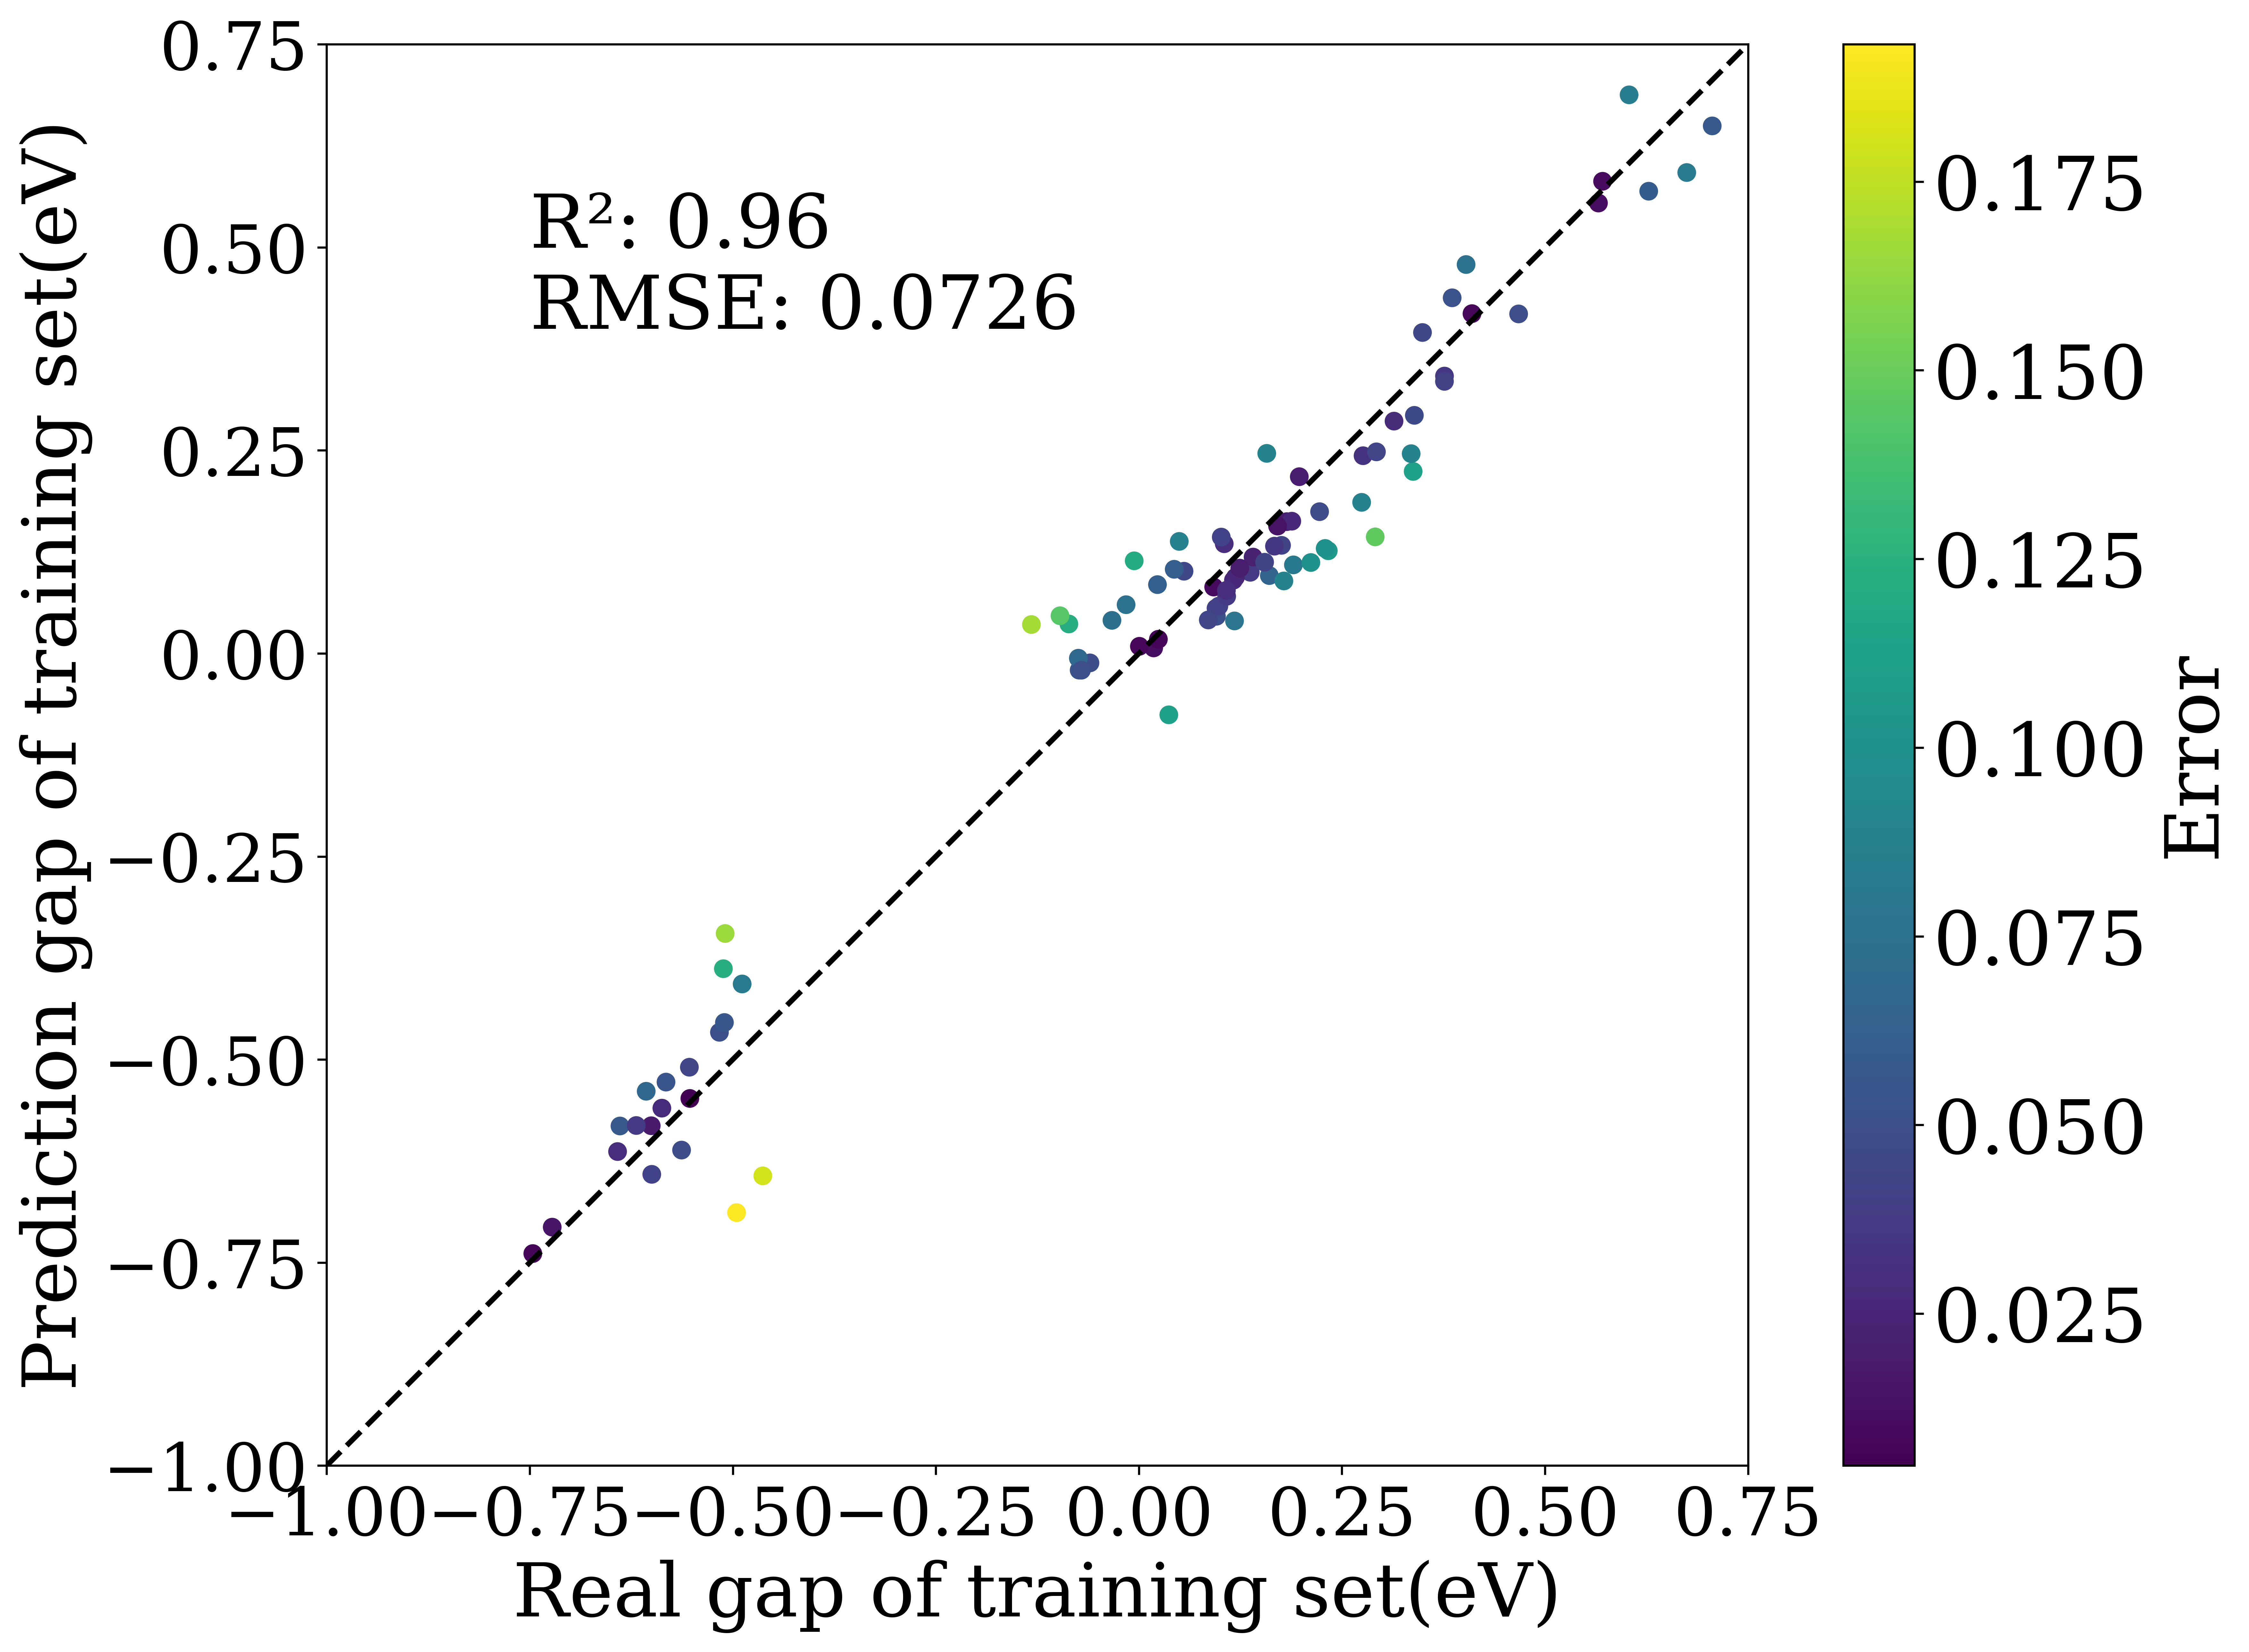

In [45]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
train_gaps_np = np.array(train_gaps)      
predictions_train_np = np.array(predictions_train_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(train_gaps_np - predictions_train_np)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(train_gaps_np,predictions_train_np, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(-1, 0.75)    
plt.ylim(-1, 0.75)

# 设置x轴和y轴的刻度，间隔为0.25  
x_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
y_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
plt.xticks(x_ticks, fontsize=25)  
plt.yticks(y_ticks, fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("Real gap of training set(eV)", fontsize=28)    
plt.ylabel("Prediction gap of training set(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(-0.75, 0.5, 'R²: {:.2f}'.format(r2_train), fontsize=28)  
plt.text(-0.75, 0.4, 'RMSE: {:.4f}'.format(rmse_train), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./photo/Prediction_train1.jpg',bbox_inches='tight')  
plt.show()  
plt.close()

# 测试集

In [46]:
# 使用模型预测能带差
predictions_test = []
for structure in test_structures:
    prediction = model.predict_structure(structure)
    predictions_test.append(prediction)

In [47]:
len(predictions_test)

18

In [48]:
predictions_test_ = [pred[0].item() for pred in predictions_test]
predictions_test_

[0.4567638039588928,
 0.18740051984786987,
 0.31022438406944275,
 0.10539316385984421,
 -0.708154559135437,
 0.46717002987861633,
 0.1933949887752533,
 0.3957255482673645,
 0.10340148955583572,
 -0.7323723435401917,
 0.17641910910606384,
 -0.5533614158630371,
 0.0754464864730835,
 0.38166260719299316,
 0.08660292625427246,
 -0.4676782190799713,
 0.051344387233257294,
 0.009486652910709381]

In [49]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(test_gaps, predictions_test))
mae_test = mean_absolute_error(test_gaps, predictions_test)
r2_test = r2_score(test_gaps, predictions_test)

In [50]:
print(rmse_test)
print(mae_test)
print(r2_test)

0.10383586298785182
0.07691757363154571
0.9382196966622508


In [51]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(test_gaps, predictions_test_))
mae_test = mean_absolute_error(test_gaps, predictions_test_)
r2_test = r2_score(test_gaps, predictions_test_)

In [52]:
print(rmse_test)
print(mae_test)
print(r2_test)

0.10383586298785182
0.07691757363154571
0.9382196966622508


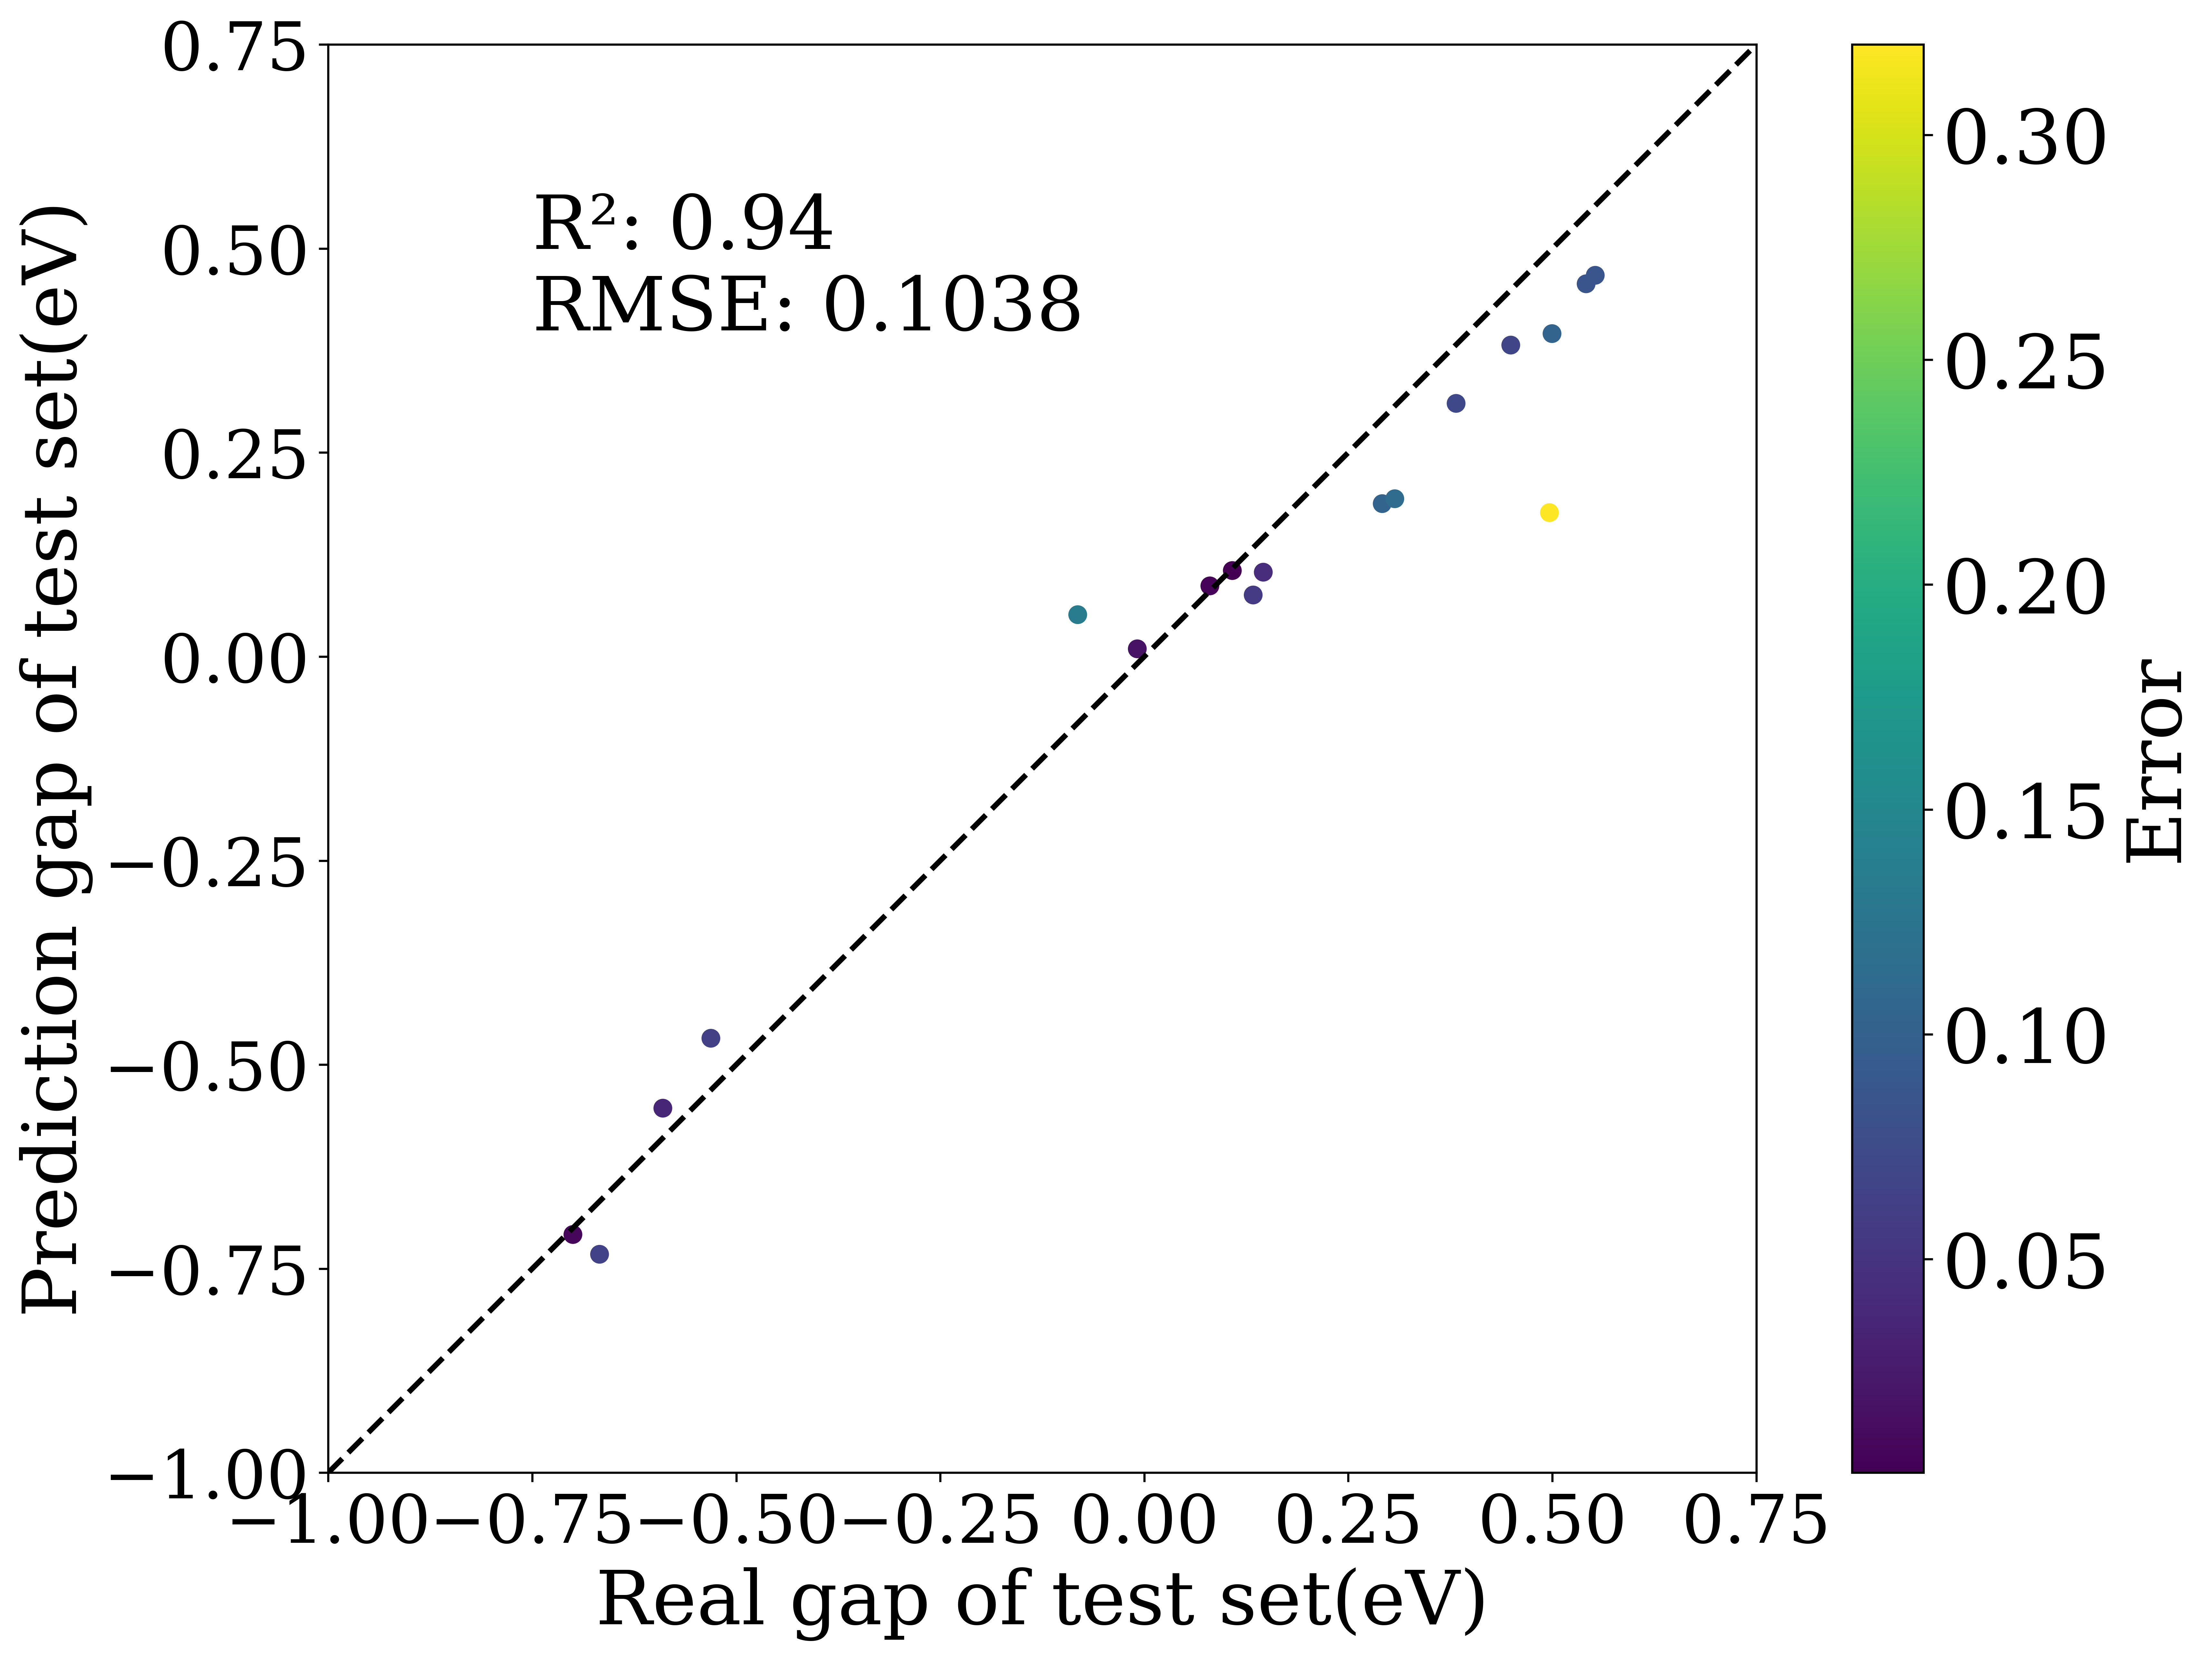

In [55]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
test_gaps_np = np.array(test_gaps)      
predictions_test_np = np.array(predictions_test_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(test_gaps_np - predictions_test_np)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(test_gaps_np,predictions_test_np, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(-1, 0.75)    
plt.ylim(-1, 0.75)

# 设置x轴和y轴的刻度，间隔为0.25  
x_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
y_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
plt.xticks(x_ticks, fontsize=25)  
plt.yticks(y_ticks, fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("Real gap of test set(eV)", fontsize=28)    
plt.ylabel("Prediction gap of test set(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(-0.75, 0.5, 'R²: {:.2f}'.format(r2_test), fontsize=28)  
plt.text(-0.75, 0.4, 'RMSE: {:.4f}'.format(rmse_test), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./photo/Prediction_test1.jpg',bbox_inches='tight')  
plt.show()  
plt.close()

# 测试集存储

In [56]:
predictions_test_

[0.4567638039588928,
 0.18740051984786987,
 0.31022438406944275,
 0.10539316385984421,
 -0.708154559135437,
 0.46717002987861633,
 0.1933949887752533,
 0.3957255482673645,
 0.10340148955583572,
 -0.7323723435401917,
 0.17641910910606384,
 -0.5533614158630371,
 0.0754464864730835,
 0.38166260719299316,
 0.08660292625427246,
 -0.4676782190799713,
 0.051344387233257294,
 0.009486652910709381]

In [57]:
test_gaps

[0.5414888888888889,
 0.2916000000000001,
 0.3821555555555556,
 0.10791851851851852,
 -0.7001444444444447,
 0.5526691358024693,
 0.3070098765432099,
 0.49969135802469156,
 0.1458666666666666,
 -0.6675027777777776,
 0.49650000000000016,
 -0.5899361111111112,
 0.13349999999999973,
 0.4491518518518518,
 0.08039166666666664,
 -0.531077777777778,
 -0.08153703703703719,
 -0.008533333333333726]

In [58]:
all_indices[90:]

[46, 35, 53, 27, 93, 43, 37, 41, 29, 79, 103, 94, 102, 12, 57, 81, 26, 75]

In [59]:
#存储dft计算的带隙值
DFT_bandgaps_train = []
for item in data_train:   
    DFT_bandgap = item['bandgap']
    DFT_bandgaps_train.append(DFT_bandgap)

In [60]:
len(DFT_bandgaps_train)

102

In [61]:
len(DFT_bandgaps_test)

6

In [62]:
new_DFT_bandgaps = DFT_bandgaps_train + DFT_bandgaps_test
len(new_DFT_bandgaps)

108

In [63]:
new_DFT_bandgaps[40]

1.4870999999999999

In [64]:
print(len(test_structures))

18


In [65]:
test_indices

[46, 35, 53, 27, 93, 43, 37, 41, 29, 79, 103, 94, 102, 12, 57, 81, 26, 75]

In [66]:
import numpy as np  

es = all_indices[90:]  # 测试集的索引  
  
# 按照测试集索引提取DFT带隙值  
extracted_DFT_bandgaps = [new_DFT_bandgaps[i] for i in test_indices]  
  
# 创建一个列表来存储结果数据  
results = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, dft_bandgap, real_gap in zip(test_structures, predictions_test_, extracted_DFT_bandgaps, test_gaps):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
    item['DFT_bandgaps'] = dft_bandgap  
    item['prediction_gaps'] = prediction  # 直接使用预测gaps值，因为它已经是一个浮点数了  
    item['real_gap'] = real_gap  # 存储对应的真实gap值  
    results.append(item)  

print(len(results))

18


In [67]:
results

[{'structure': {'@module': 'pymatgen.core.structure',
   '@class': 'Structure',
   'charge': 0,
   'lattice': {'matrix': [[18.011224080397273, -4.3791e-11, 7.011853049e-06],
     [1.25596217e-08, 6.003347681021877, -3.11045256e-08],
     [-2.8561361e-09, 4.02247e-11, 6.406338487922601]],
    'pbc': (True, True, True),
    'a': 18.011224080398637,
    'b': 6.003347681021877,
    'c': 6.406338487922601,
    'alpha': 90.00000029650096,
    'beta': 89.99997772003151,
    'gamma': 89.99999988027074,
    'volume': 692.7022637609163},
   'properties': {},
   'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
     'abc': [0.1666666699999979, 0.5, 0.5],
     'xyz': [3.001870744955331, 3.001673840523752, 3.203170397051236],
     'properties': {},
     'label': 'Cs'},
    {'species': [{'element': 'Cs', 'occu': 1}],
     'abc': [0.5, 0.5, 0.5],
     'xyz': [9.005612045050379, 3.0016738405091554, 3.203172734335562],
     'properties': {},
     'label': 'Cs'},
    {'species': [{'element': 'Cs', '

In [68]:
results[0]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[18.011224080397273, -4.3791e-11, 7.011853049e-06],
    [1.25596217e-08, 6.003347681021877, -3.11045256e-08],
    [-2.8561361e-09, 4.02247e-11, 6.406338487922601]],
   'pbc': (True, True, True),
   'a': 18.011224080398637,
   'b': 6.003347681021877,
   'c': 6.406338487922601,
   'alpha': 90.00000029650096,
   'beta': 89.99997772003151,
   'gamma': 89.99999988027074,
   'volume': 692.7022637609163},
  'properties': {},
  'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.1666666699999979, 0.5, 0.5],
    'xyz': [3.001870744955331, 3.001673840523752, 3.203170397051236],
    'properties': {},
    'label': 'Cs'},
   {'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.5, 0.5, 0.5],
    'xyz': [9.005612045050379, 3.0016738405091554, 3.203172734335562],
    'properties': {},
    'label': 'Cs'},
   {'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.

In [69]:
import json  
  
# 将结果列表转换为JSON格式  
results_json = json.dumps(results)  
  
# 将JSON数据写入文件  
with open('./predicition_results_megnetGapTest.json', 'w') as file:  
    file.write(results_json)

In [71]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas = []  
  
# 遍历结果列表  
for result in results:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas.append(formula)  
    
    
    
df = pd.DataFrame(results)  
  
# 添加化学式作为新的一列  
df['Formula'] = formulas  
  
# 重命名列名  
df.columns = ['Structure', 'DFT_bandgaps', 'Predicted_gaps', 'Real_gaps', 'Formula']  
  
# 将数据帧写入CSV文件  
df

,Structure,DFT_bandgaps,Predicted_gaps,Real_gaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.5574,0.456764,0.541489,Cs3 Pb3 I3 Br6
1,"{'@module': 'pymatgen.core.structure', '@class...",1.9984,0.187401,0.291600,H18 Pb3 C3 Br9 N3
2,"{'@module': 'pymatgen.core.structure', '@class...",1.5134,0.310224,0.382156,Cs3 Pb3 I6 Br3
3,"{'@module': 'pymatgen.core.structure', '@class...",1.7806,0.105393,0.107919,H18 Pb3 C3 I4 Br5 N3
4,"{'@module': 'pymatgen.core.structure', '@class...",2.5232,-0.708155,-0.700144,Cs4 Pb4 I10 Br2
5,"{'@module': 'pymatgen.core.structure', '@class...",1.4698,0.467170,0.552669,Cs3 Pb3 I4 Br5
6,"{'@module': 'pymatgen.core.structure', '@class...",1.4962,0.193395,0.307010,Cs3 Pb3 I8 Br1
7,"{'@module': 'pymatgen.core.structure', '@class...",1.4550,0.395726,0.499691,Cs3 Pb3 I5 Br4
8,"{'@module': 'pymatgen.core.structure', '@class...",1.8308,0.103401,0.145867,H18 Pb3 C3 I3 Br6 N3
9,"{'@module': 'pymatgen.core.structure', '@class...",2.4616,-0.732372,-0.667503,Cs4 Pb4 I11 Br1


In [86]:
df.to_csv('./excel/PredicitionResultsMegnetGap_test.csv',index = False)

# 训练集存储

In [73]:
predictions_train_

[0.10118366032838821,
 0.040705859661102295,
 0.24630087614059448,
 0.22405830025672913,
 -0.7064130306243896,
 0.09987350553274155,
 0.11859466135501862,
 0.006771025247871876,
 0.16225454211235046,
 0.0555817075073719,
 0.08469011634588242,
 0.13307690620422363,
 0.09582912921905518,
 0.03626105934381485,
 -0.46651753783226013,
 0.4787992238998413,
 0.1263963282108307,
 0.1860051155090332,
 0.24591031670570374,
 0.045711860060691833,
 0.03557707741856575,
 -0.4544410705566406,
 -0.539100170135498,
 0.041194818913936615,
 0.14346575736999512,
 0.09368662536144257,
 0.3414628207683563,
 0.1745128631591797,
 0.008743368089199066,
 0.5813120603561401,
 0.24339452385902405,
 0.3349643647670746,
 0.03998566418886185,
 0.2860020399093628,
 0.6877230405807495,
 0.0892050564289093,
 0.058269988745450974,
 0.16279083490371704,
 0.41834303736686707,
 0.4179878234863281,
 0.12923941016197205,
 -0.613349437713623,
 -0.5479755401611328,
 0.5920782685279846,
 0.09020624309778214,
 -0.68853712081909

In [74]:
len(train_structures)

90

In [75]:
train_gaps

[0.055618518518518734,
 -0.033137037037036965,
 0.15746666666666687,
 0.3376999999999999,
 -0.7223027777777777,
 0.13716666666666666,
 0.14062499999999978,
 0.01822500000000038,
 0.1822629629629624,
 0.09499166666666703,
 0.02289999999999992,
 0.17566666666666642,
 0.16064074074074064,
 -0.0861925925925926,
 -0.5164249999999999,
 0.4028999999999998,
 0.23320000000000007,
 0.2742962962962967,
 0.3352617283950614,
 0.09549166666666697,
 -0.13230000000000008,
 -0.5102777777777776,
 -0.6065999999999998,
 0.08549999999999991,
 0.2910074074074076,
 0.11890000000000023,
 0.3763074074074073,
 0.2225074074074076,
 0.0006666666666665932,
 0.5709543209876544,
 0.2760296296296294,
 0.3762617283950618,
 0.1177666666666668,
 0.31416666666666626,
 0.6035999999999997,
 0.17856666666666654,
 0.09850000000000048,
 0.1882962962962964,
 0.41015555555555583,
 0.46759135802469176,
 0.22936296296296255,
 -0.6418444444444447,
 -0.5528361111111111,
 0.6745888888888887,
 0.1164666666666665,
 -0.4953444444444446

In [76]:
all_indices[:90]

[23,
 25,
 0,
 104,
 85,
 65,
 63,
 73,
 32,
 71,
 14,
 10,
 5,
 22,
 101,
 17,
 69,
 7,
 42,
 70,
 18,
 80,
 92,
 106,
 33,
 105,
 8,
 34,
 59,
 51,
 13,
 45,
 58,
 1,
 52,
 66,
 76,
 6,
 38,
 40,
 31,
 96,
 95,
 47,
 61,
 90,
 88,
 36,
 3,
 86,
 99,
 49,
 16,
 60,
 68,
 50,
 84,
 19,
 44,
 4,
 97,
 78,
 64,
 82,
 77,
 72,
 2,
 30,
 21,
 28,
 48,
 87,
 89,
 83,
 62,
 11,
 55,
 67,
 98,
 9,
 39,
 107,
 91,
 54,
 74,
 100,
 24,
 15,
 20,
 56]

In [77]:
len(all_indices[:90])

90

In [78]:
import numpy as np  

es2 = all_indices[:90]  # 训练集的索引  

train_indices = es2.copy()
# 按照测试集索引提取DFT带隙值  
extracted_DFT_bandgaps_train = [new_DFT_bandgaps[i] for i in train_indices]  

In [79]:
len(extracted_DFT_bandgaps_train)

90

In [80]:
# 创建一个列表来存储结果数据  
results_train = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, dft_bandgap, real_gap in zip(train_structures, predictions_train_, extracted_DFT_bandgaps_train, train_gaps):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
    item['DFT_bandgaps'] = dft_bandgap  
    item['prediction_gaps'] = prediction  # 直接使用预测gaps值，因为它已经是一个浮点数了  
    item['real_gap'] = real_gap  # 存储对应的真实gap值  
    results_train.append(item)  

print(len(results_train))

90


In [81]:
import json  
  
# 将结果列表转换为JSON格式  
results_train_json = json.dumps(results_train)  
  
# 将JSON数据写入文件  
with open('./json/predicition_results_megnetGapTrain.json', 'w') as file:  
    file.write(results_train_json)

In [83]:
results_train[-1]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[8.52629705748297,
     0.0297208970845501,
     0.0686382186408844],
    [0.1638277835390531, 8.512340191198762, 0.065105567618519],
    [0.0621446986717499, 0.0169339914610782, 13.135414240321882]],
   'pbc': (True, True, True),
   'a': 8.526625126579946,
   'b': 8.514165479264074,
   'c': 13.135572160682255,
   'alpha': 89.48280858033304,
   'beta': 89.2674473389329,
   'gamma': 88.69425852546664,
   'volume': 953.2424730046233},
  'properties': {},
  'sites': [{'species': [{'element': 'H', 'occu': 1}],
    'abc': [0.6545375642423698, 0.0245109049987674, 0.2374014823175624],
    'xyz': [5.599550518833124, 0.23211876000289486, 3.1648889003335605],
    'properties': {},
    'label': 'H'},
   {'species': [{'element': 'H', 'occu': 1}],
    'abc': [0.5021936427066034, 0.0214980657144611, 0.3329809169227739],
    'xyz': [4.306067157297952, 0.20356319038950987, 4.4097115987

In [84]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas_train = []  
  
# 遍历结果列表  
for result in results_train:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas_train.append(formula)  
    
    
    
ddd = pd.DataFrame(results_train)  
  
# 添加化学式作为新的一列  
ddd['Formula'] = formulas_train  
  
# 重命名列名  
ddd.columns = ['Structure', 'DFT_bandgaps', 'Predicted_gaps', 'Real_gaps', 'Formula']  
  
# 将数据帧写入CSV文件  
ddd

,Structure,DFT_bandgaps,Predicted_gaps,Real_gaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.7529,0.101184,0.055619,H18 Pb3 C3 I5 Br4 N3
1,"{'@module': 'pymatgen.core.structure', '@class...",1.7061,0.040706,-0.033137,H18 Pb3 C3 I7 Br2 N3
2,"{'@module': 'pymatgen.core.structure', '@class...",1.7892,0.246301,0.157467,H15 Pb3 C3 I3 Br6 N6
3,"{'@module': 'pymatgen.core.structure', '@class...",1.9423,0.224058,0.337700,H22 Pb4 C4 Br12 N6
4,"{'@module': 'pymatgen.core.structure', '@class...",2.5164,-0.706413,-0.722303,Cs4 Pb4 I11 Br1
...,...,...,...,...,...
85,"{'@module': 'pymatgen.core.structure', '@class...",2.7153,-0.509505,-0.553425,Cs4 Pb4 I3 Br9
86,"{'@module': 'pymatgen.core.structure', '@class...",1.7588,0.137906,0.049719,H18 Pb3 C3 I5 Br4 N3
87,"{'@module': 'pymatgen.core.structure', '@class...",1.7461,0.437813,0.385752,H15 Pb3 C3 I1 Br8 N6
88,"{'@module': 'pymatgen.core.structure', '@class...",1.7424,0.114007,-0.005733,H18 Pb3 C3 I6 Br3 N3


In [85]:
ddd.to_csv('./excel/PredicitionResultsMegnetGap_train.csv',index = False)